In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from utils import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

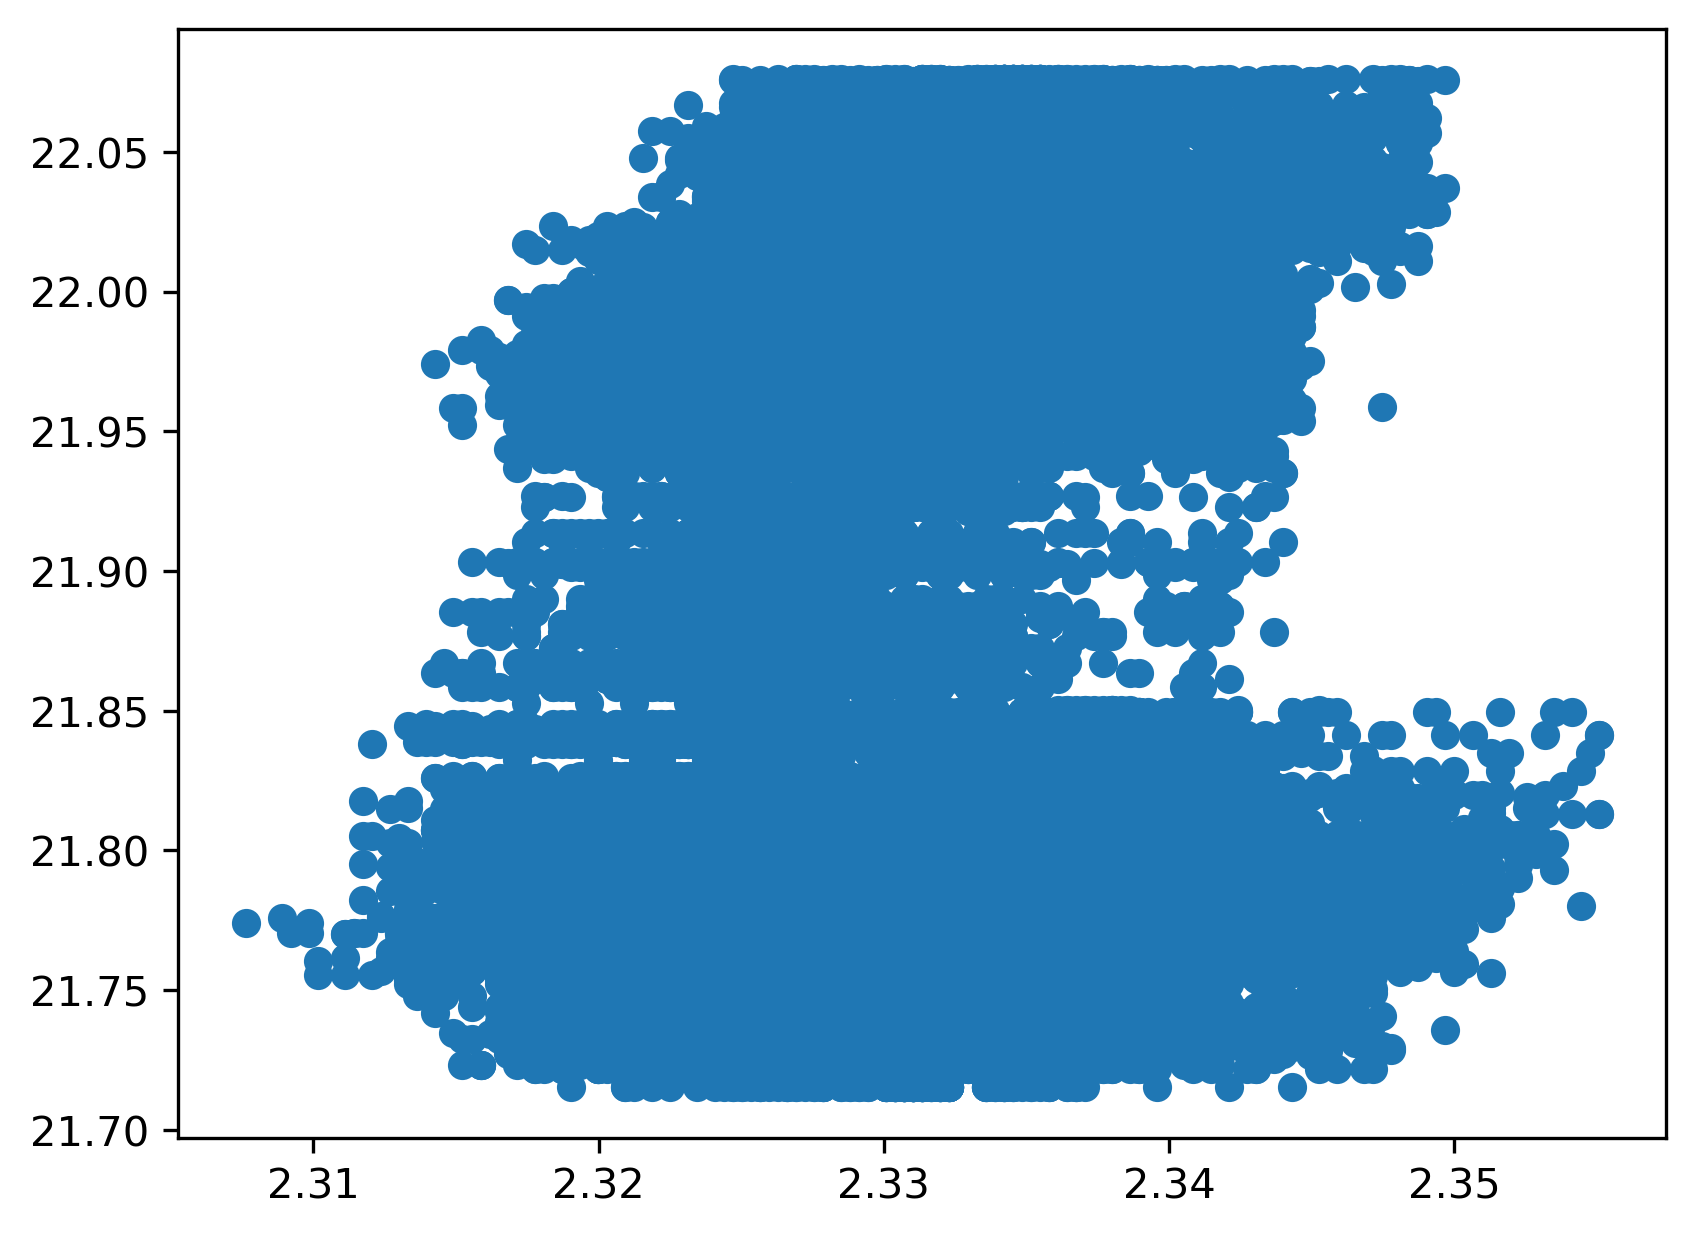

In [48]:
df = pd.read_csv('data/Ambient.csv')
df = convert_time_to_seconds(df, 'Time')

#plt.scatter(df['Voltage_0 (Collected)'], df['Temperature_0 (Collected)'])
plt.scatter(df['Voltage_1 (Collected)'], df['Temperature_0 (Collected)'])

#plt.plot(df['Time'], df['Voltage_0 (Collected)'])
#plt.plot(df['Time'], df['Voltage_1 (Collected)'])

In [49]:
# Calibrate Thermistor
calibration_df = df
coeff1 = get_steinhart_hart_coefficents(calibration_df)
coeff1 = [ 0.0262222,  -0.08212696,  0.09546998] # from h2a
print('Thermistor Coefficents', coeff1)

df['Temperature_1 (Thermistor)'] = get_thermistor_temperatures(df,coeff1)

Thermistor Coefficents [0.0262222, -0.08212696, 0.09546998]


In [50]:
# calibrate IC Sensor
calibration_df = df
ic_coeff = get_IC_coefficents(calibration_df) # from this data
ic_coeff = [ 23.13923163, -31.00751685] # from h2a

print('ic_coeff:', ic_coeff)

df['Temperature_2 (IC Sensor)'] = get_IC_temperatures(df, ic_coeff)

ic_coeff: [23.13923163, -31.00751685]


Text(0, 0.5, 'Temperature (C)')

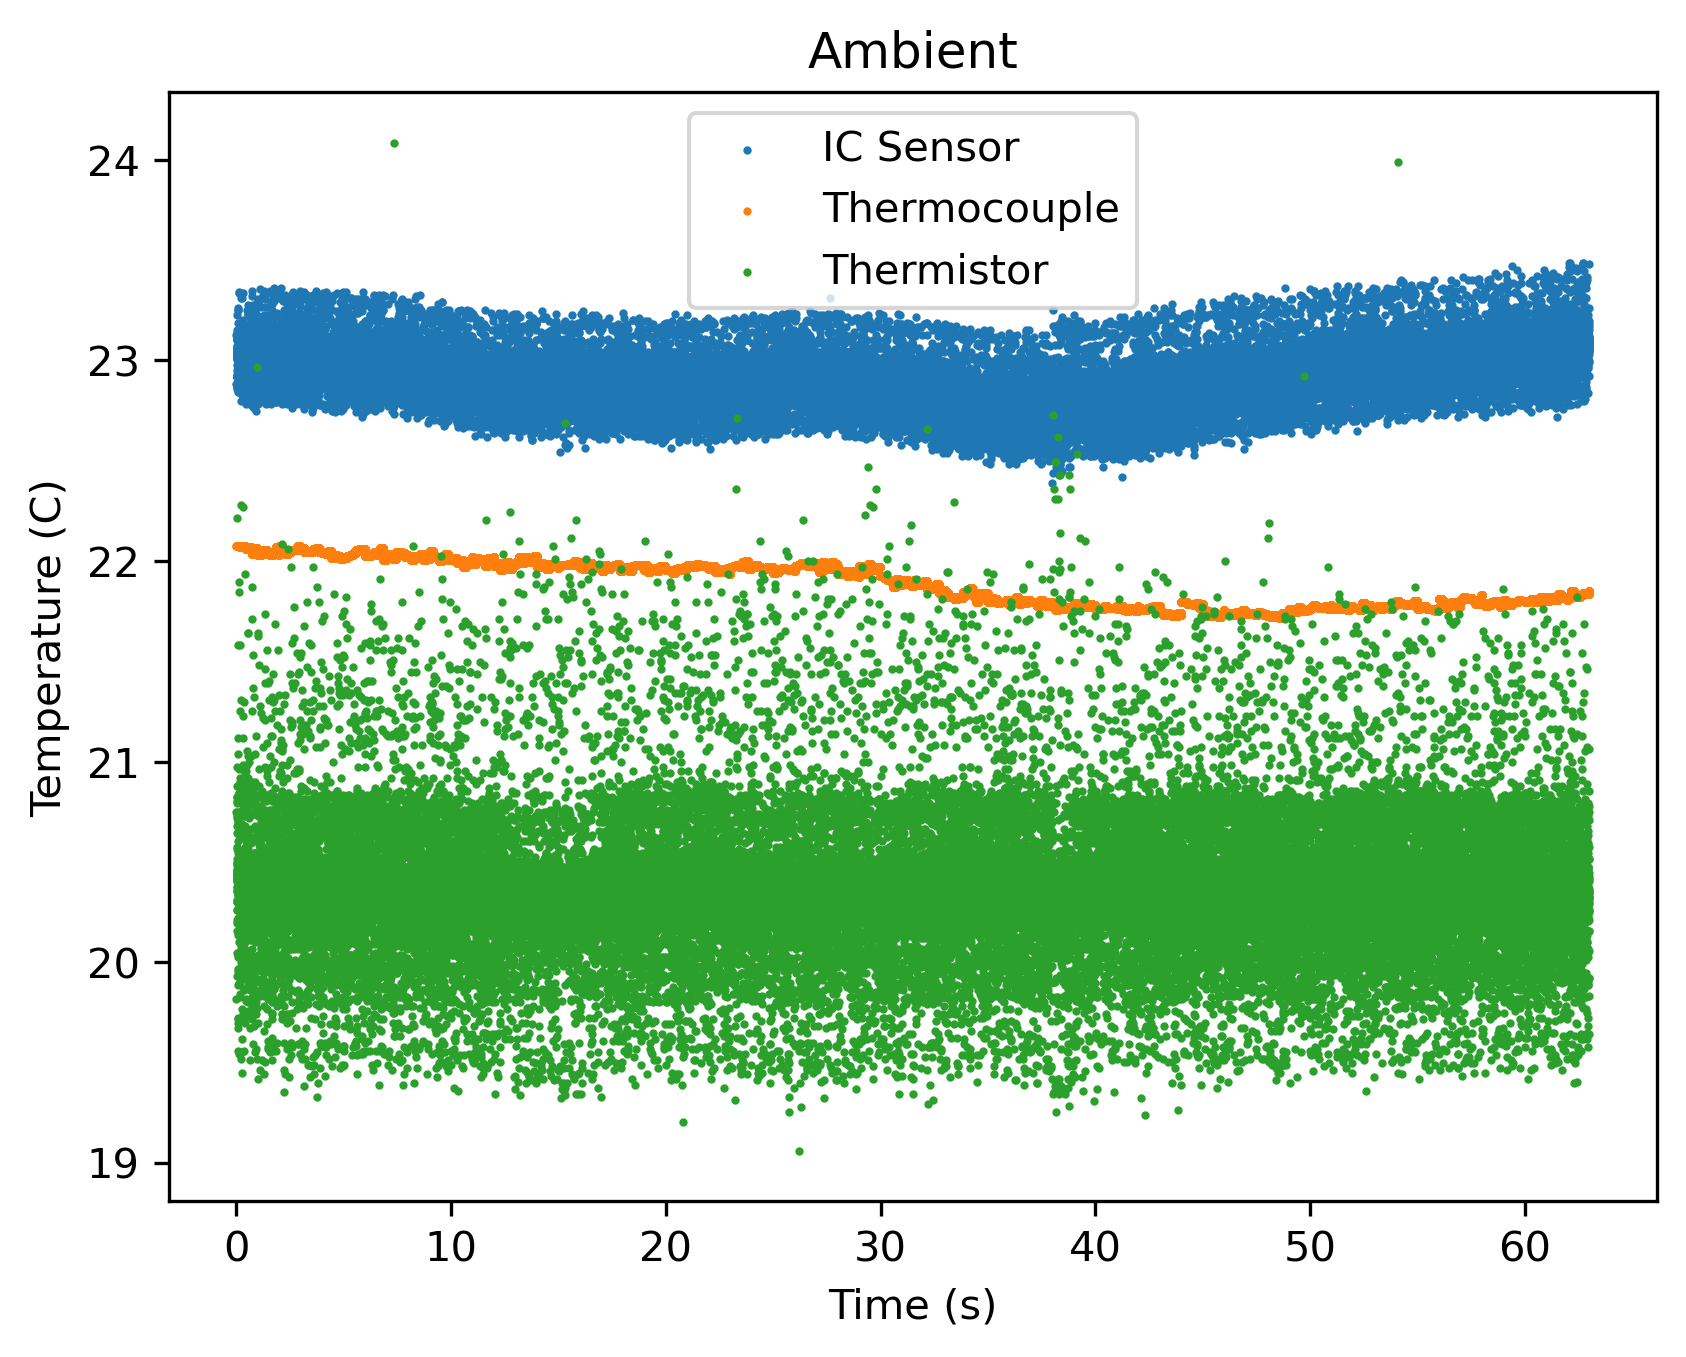

In [51]:
#plt.plot(df['Time'],df['Temperature_1 (Thermistor)'], label = 'Thermistor', alpha = 1.0)
plt.scatter(df['Time'],df['Temperature_2 (IC Sensor)'], label = 'IC Sensor', s = 1)
plt.scatter(df['Time'], df['Temperature_0 (Collected)'], label = 'Thermocouple', s=1)
plt.scatter(df['Time'],df['Temperature_1 (Thermistor)'], label = 'Thermistor', s=1)


plt.title('Ambient')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')


Mean =  21.72076385577242
std_dev =  1.064891243404629
n = 189000
Mean Temperature (all sensors) = 21.72076385577242 +- 0.0048009858405894295


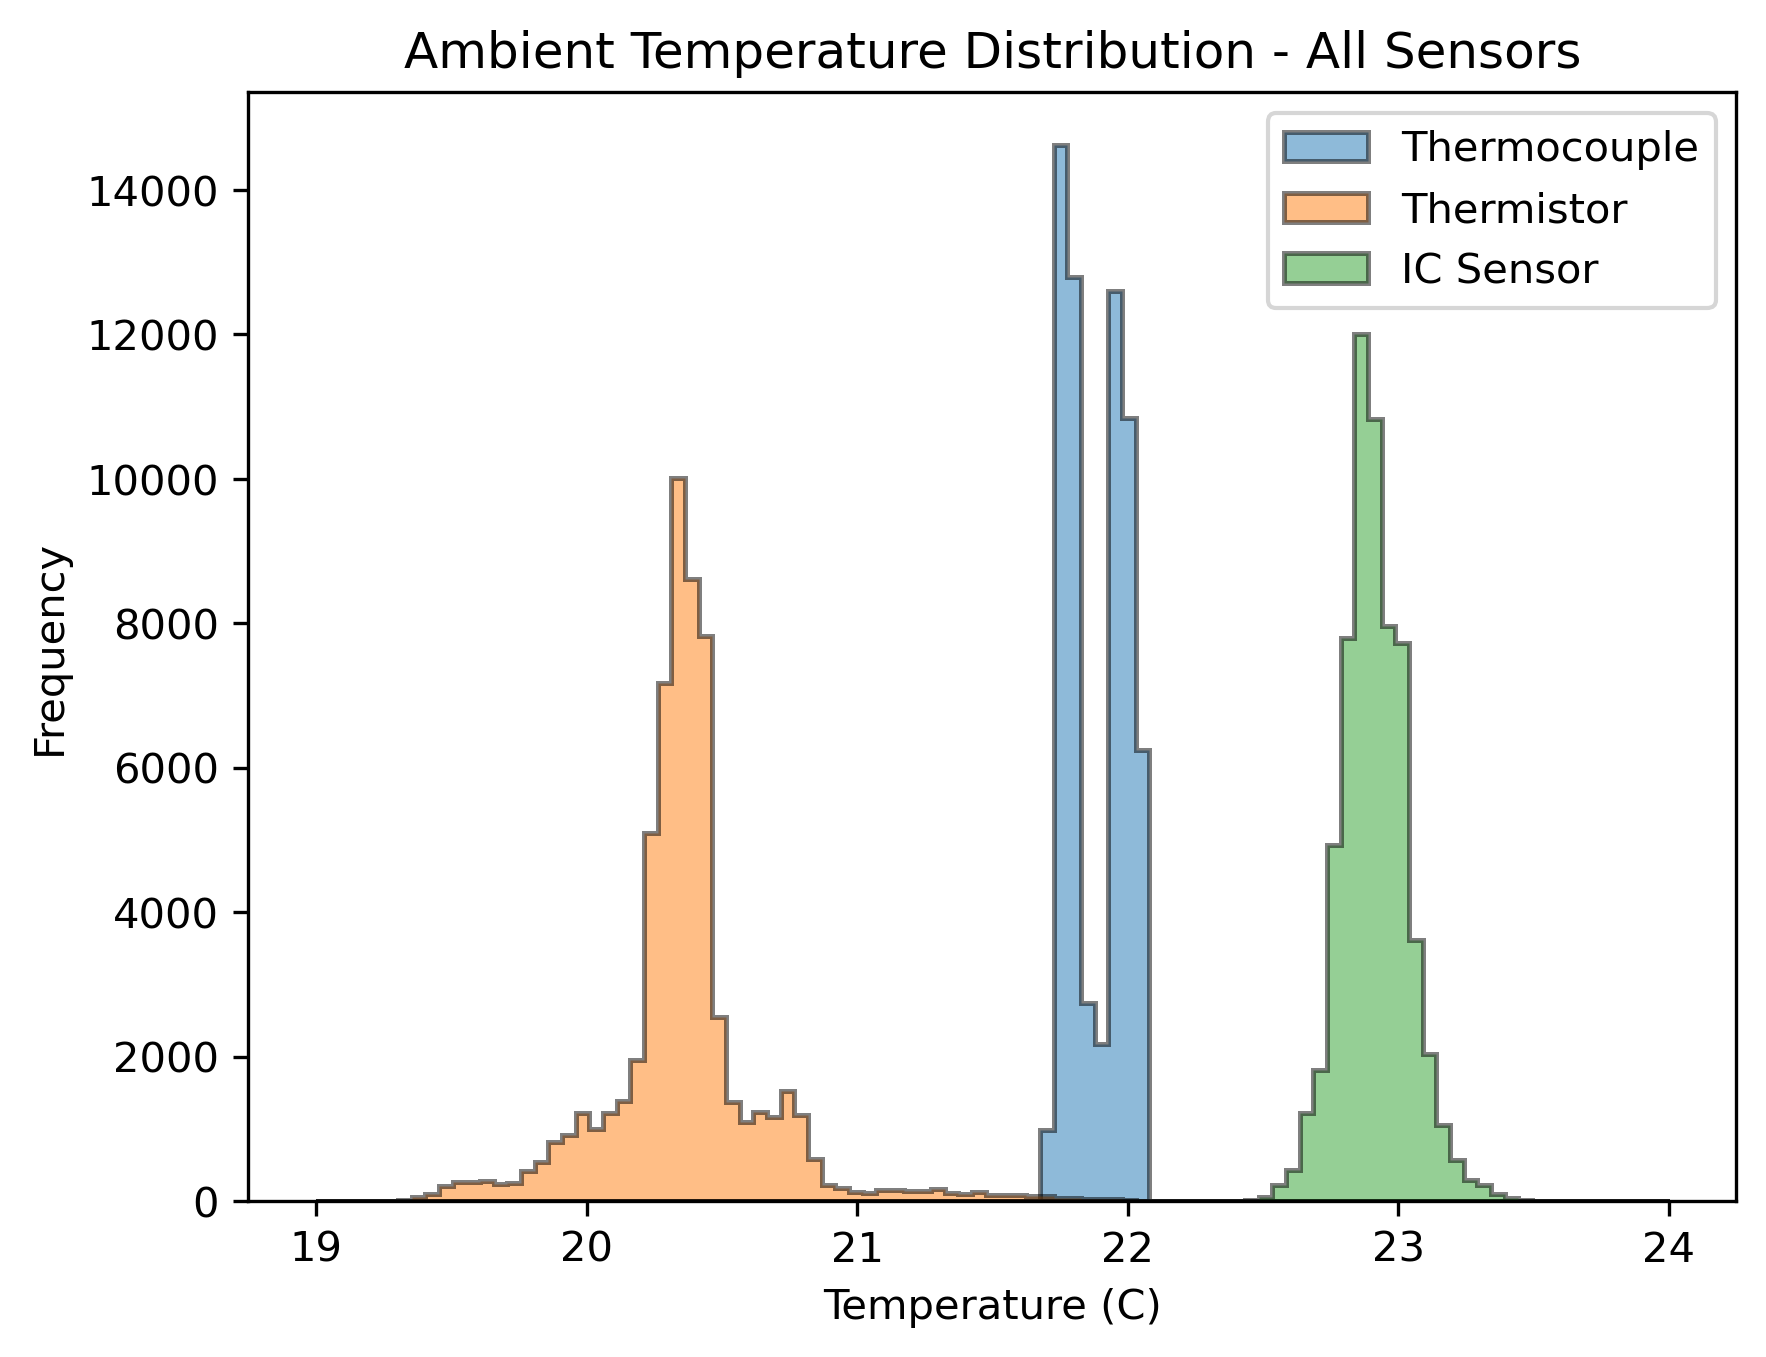

In [52]:
bins = np.linspace(19,24,100)
plt.hist(df['Temperature_0 (Collected)'], bins, histtype='stepfilled',edgecolor='black', linewidth=1.2, alpha = .5, label='Thermocouple')
plt.hist(df['Temperature_1 (Thermistor)'], bins, histtype='stepfilled',edgecolor='black', linewidth=1.2, alpha = .5, label='Thermistor')
plt.hist(df['Temperature_2 (IC Sensor)'], bins, histtype='stepfilled',edgecolor='black', linewidth=1.2, alpha = .5, label='IC Sensor')
plt.title('Ambient Temperature Distribution - All Sensors')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.legend()
_=''

all_sensors = pd.concat([df['Temperature_0 (Collected)'],df['Temperature_1 (Thermistor)'],df['Temperature_2 (IC Sensor)']])

mean = all_sensors.mean()
std_dev = all_sensors.std()
n = all_sensors.size
ci_half_width = 1.96 * std_dev / np.sqrt(n)

print('Mean = ',mean)
print('std_dev = ',std_dev)
print('n =',n)

print(f'Mean Temperature (all sensors) = {mean} +- {ci_half_width}')


Mean =  21.88668000793651
std_dev =  0.11077686469678408
n = 63000
Mean Thermocouple Temperature = 21.88668000793651 +- 0.0008650373625280152


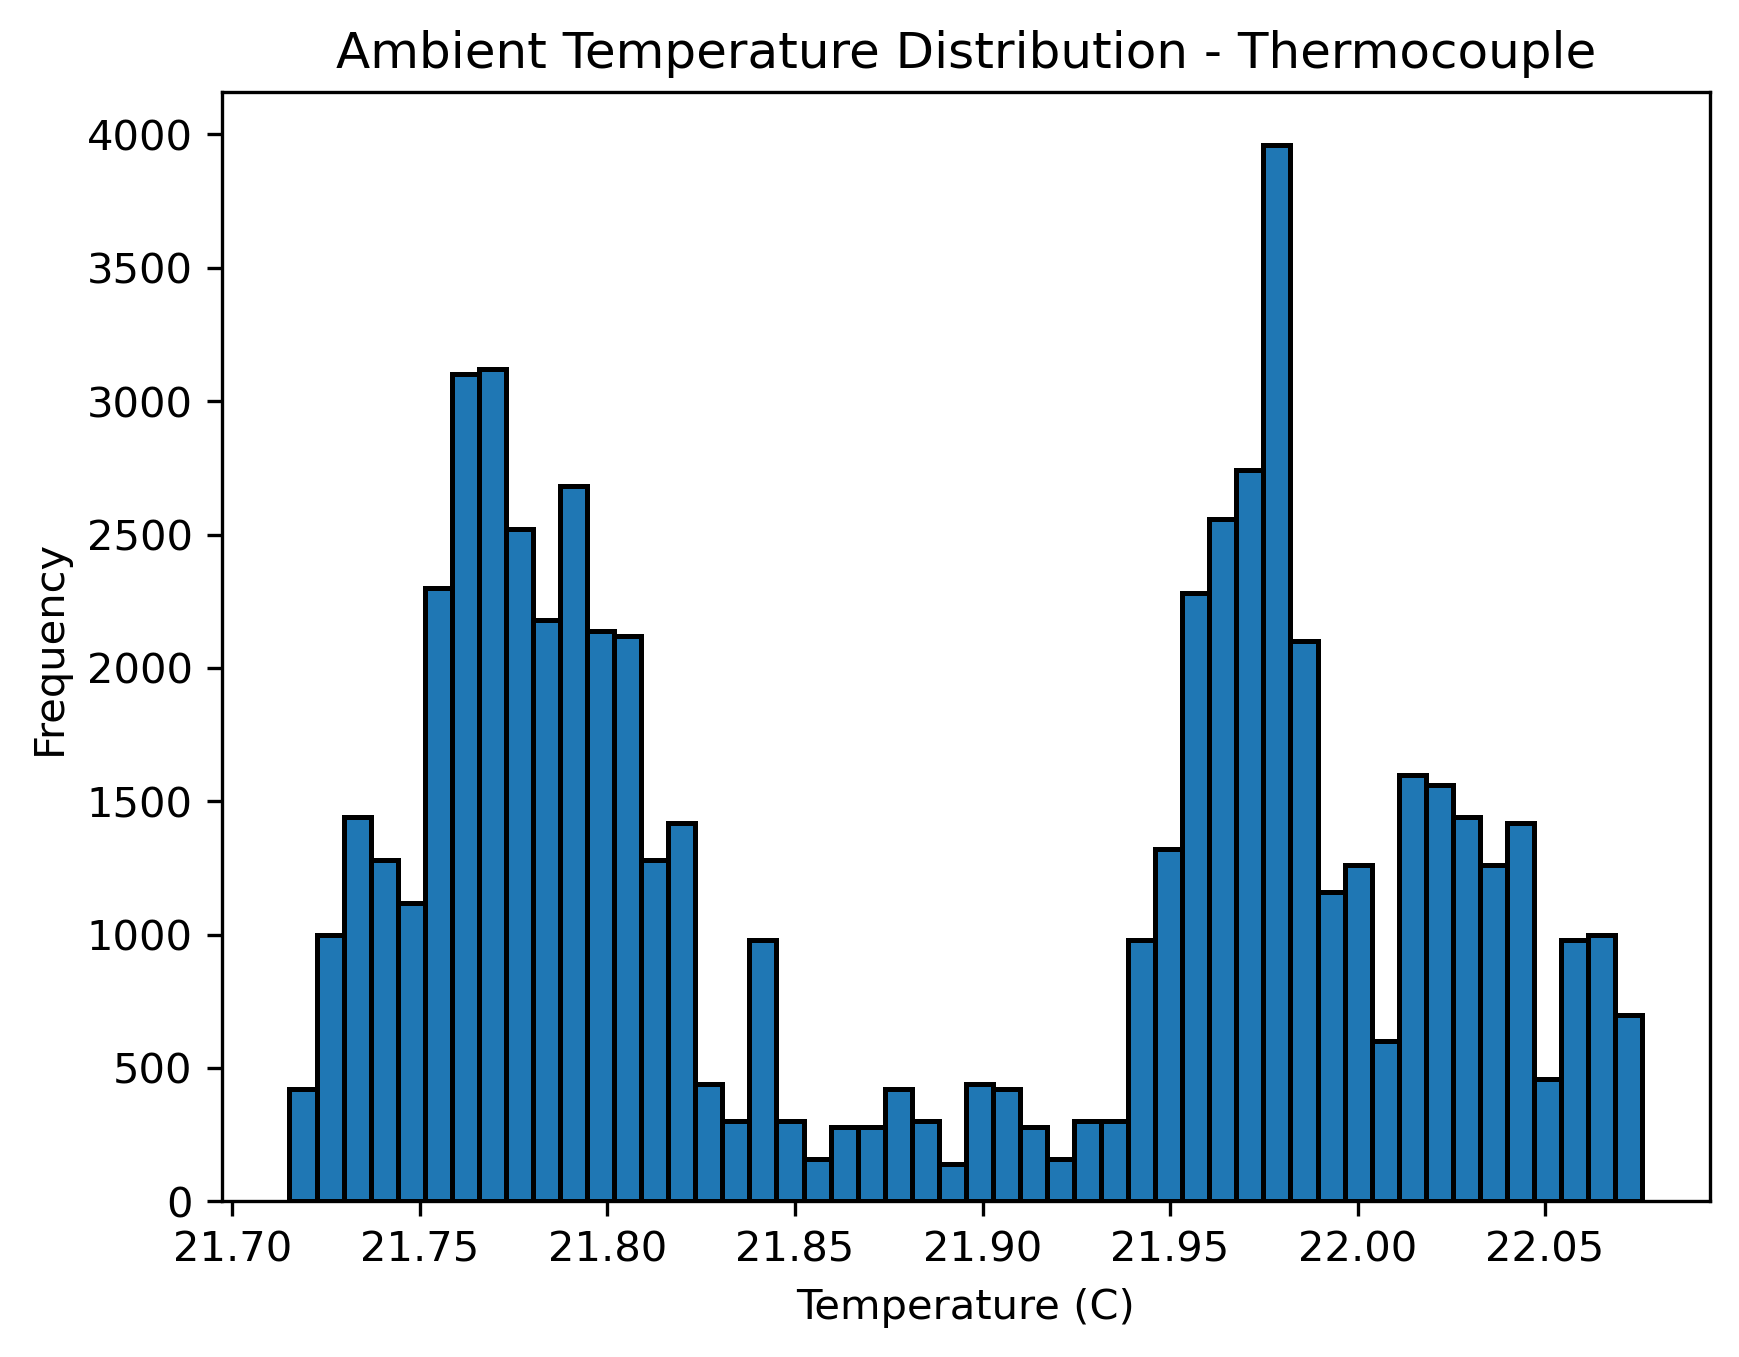

In [53]:
plt.hist(df['Temperature_0 (Collected)'], bins=50, histtype='bar',edgecolor='black', linewidth=1.2, label='Thermocouple')
plt.title('Ambient Temperature Distribution - Thermocouple')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

# calculate mean
mean = df['Temperature_0 (Collected)'].mean()
std_dev = df['Temperature_0 (Collected)'].std()
n = df['Temperature_0 (Collected)'].size
ci_half_width = 1.96 * std_dev / np.sqrt(n)

print('Mean = ',mean)
print('std_dev = ',std_dev)
print('n =',n)

print(f'Mean Thermocouple Temperature = {mean} +- {ci_half_width}')

Mean =  20.364251946895656
std_dev =  0.29955371702390426
n = 63000
Mean Thermistor Temperature = 20.364251946895656 +- 0.0023391631277802733


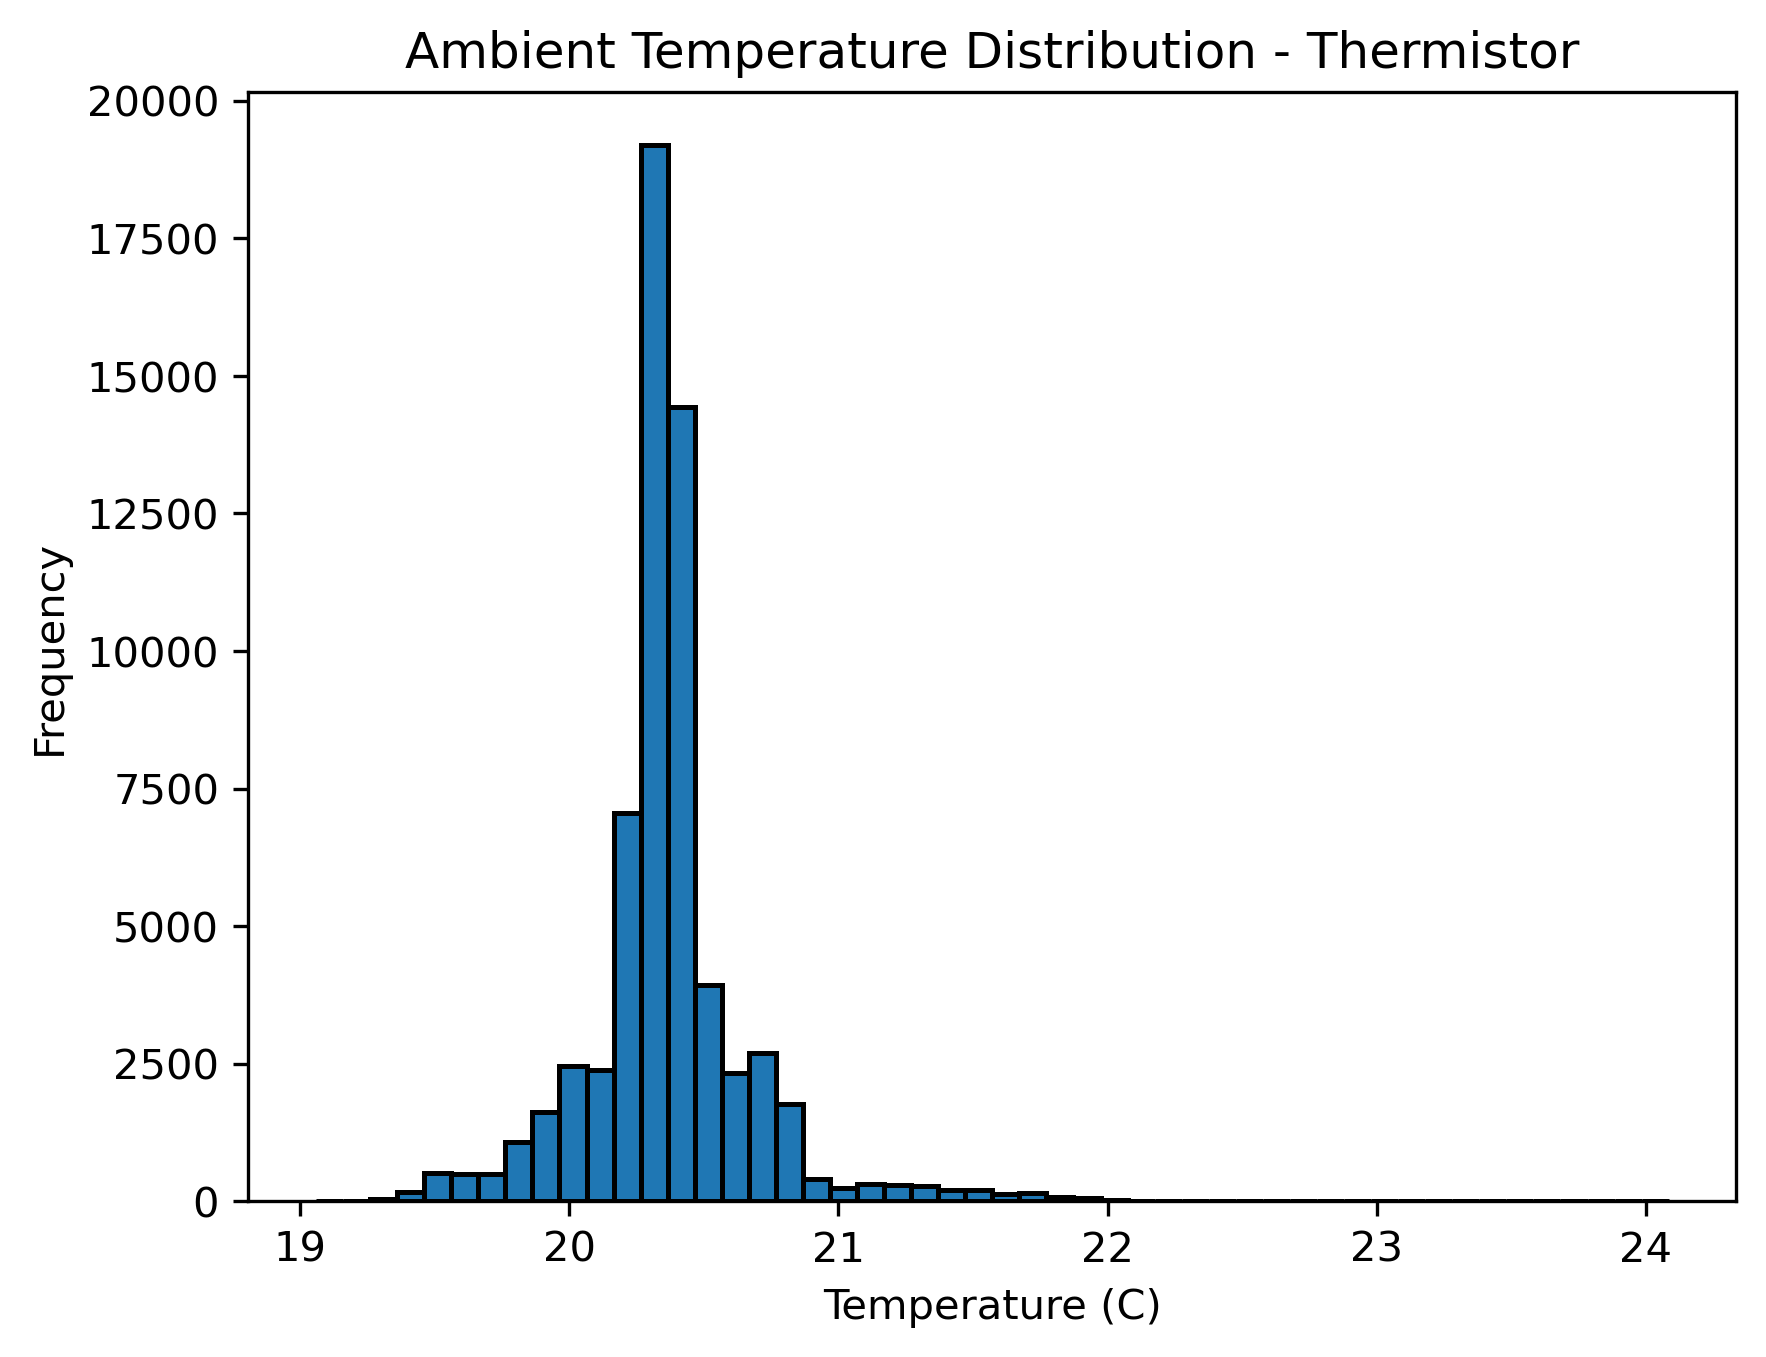

In [54]:
plt.hist(df['Temperature_1 (Thermistor)'], bins=50, histtype='bar',edgecolor='black', linewidth=1.2, label='Thermistor')
plt.title('Ambient Temperature Distribution - Thermistor')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

# calculate mean
mean = df['Temperature_1 (Thermistor)'].mean()
std_dev = df['Temperature_1 (Thermistor)'].std()
n = df['Temperature_1 (Thermistor)'].size
ci_half_width = 1.96 * std_dev / np.sqrt(n)

print('Mean = ',mean)
print('std_dev = ',std_dev)
print('n =',n)

print(f'Mean Thermistor Temperature = {mean} +- {ci_half_width}')

Mean =  22.911359612485107
std_dev =  0.12161006245423792
n = 63000
Mean IC Sensor Temperature = 22.911359612485107 +- 0.0009496319287445506


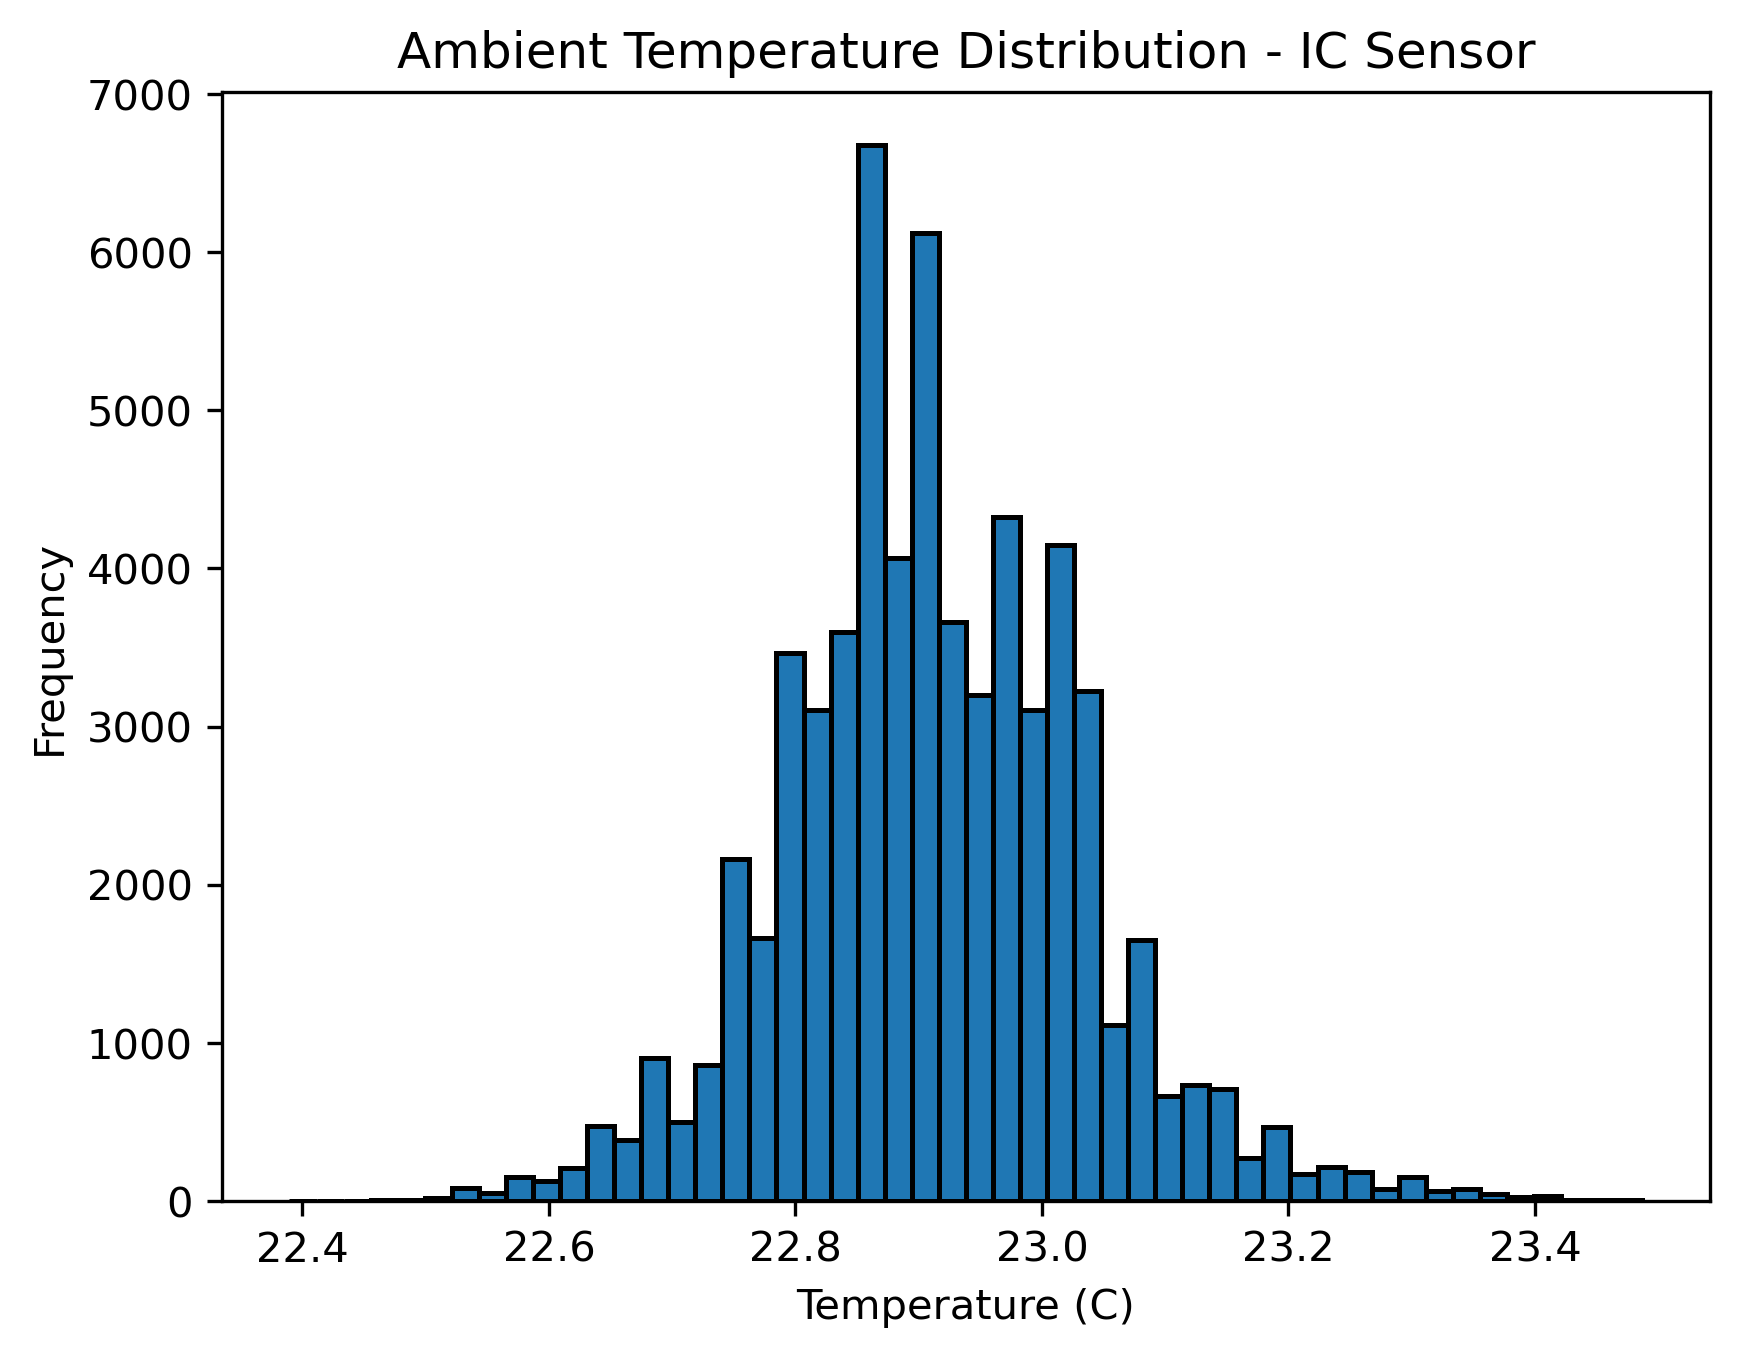

In [55]:
plt.hist(df['Temperature_2 (IC Sensor)'], bins=50, histtype='bar',edgecolor='black', linewidth=1.2, label='IC_Sensor')
plt.title('Ambient Temperature Distribution - IC Sensor')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

# calculate mean
mean = df['Temperature_2 (IC Sensor)'].mean()
std_dev = df['Temperature_2 (IC Sensor)'].std()
n = df['Temperature_2 (IC Sensor)'].size
ci_half_width = 1.96 * std_dev / np.sqrt(n)

print('Mean = ',mean)
print('std_dev = ',std_dev)
print('n =',n)

print(f'Mean IC Sensor Temperature = {mean} +- {ci_half_width}')